In [1]:
#hide code
#from https://stackoverflow.com/questions/27934885/how-to-hide-code-from-cells-in-ipython-notebook-visualized-with-nbviewer

from IPython.display import HTML

HTML('''<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
<form action="javascript:code_toggle()"><input type="submit" value="Click here to toggle on/off the raw code."></form>''')

In [2]:
!pip install -r requirements.txt -q

In [3]:
import pandas as pd
import numpy as np

%matplotlib notebook
import matplotlib.pyplot as plt
import matplotlib
from matplotlib.widgets import Slider, Button, RadioButtons, CheckButtons

In [4]:
data_df=pd.read_csv("dataConverted.csv")

In [5]:
data_df["Month of Period End"]=pd.to_datetime(
    data_df["Month of Period End"],
    format="%B %Y")

In [6]:
for i in range(data_df.shape[0]):
    if type(data_df.iloc[i,0])==str:
        current_region=data_df.iloc[i,0]
        if current_region[0]==" ":
            current_region=current_region[1:]

    data_df.iloc[i,0]=current_region

In [7]:
def convert_str_to_float(s):
    
    if type(s)==str:
        if s[0]=="$":
            s=s[1:]
        if s[-1]=="%":
            scale=1/100
            s=s[:-1]
        elif s[-1]=="K":
            scale=10**3

            s=s[:-1]
        else:
            scale=1
        return scale*float(s.replace(',' , ''))
    else:
        return s

    

In [8]:
for i in range(2,data_df.shape[1]):
    data_df.iloc[:,i]=data_df.iloc[:,i].apply(convert_str_to_float)

In [9]:
def draw_a_data(ax,X,Y,label,color,ylabel,add_text="",
                   scale=1,
                   percent=False):
    if percent:
        Y=(Y/Y.iloc[0]-1)*100
    Y=Y*scale
    ax.plot(X,Y,label=label,color=color)
    ax.set_ylabel(ylabel+f" ({add_text})")

In [10]:
def draw(ax,fig,data_df,data_to_plot,data_info,regions,region_colors):
        ax.cla()
        for region in regions:
            data=data_df[data_df.Region==region]
            X=data["Month of Period End"]
            Y=data[data_to_plot]
            draw_a_data(ax,X,Y,region,region_colors[region],data_to_plot,
                        **data_info)
        ax.legend()
        fig.canvas.draw_idle()

In [11]:
regions=sorted(list(np.unique(data_df.Region)))

cmap = matplotlib.cm.get_cmap('brg')

region_colors={}
for i,region in enumerate(regions):
    region_colors[region]=cmap(i/len(regions))
    
data_types=[]
for data_type in data_df.columns[2:]:
    if "YoY" not in data_type and "MoM" not in data_type:
        data_types.append(data_type)

data_info={'Median Sale Price':{"add_text":"%",
                                "percent":True},
 'Homes Sold':{"add_text":"%",
                "percent":True},
 'New Listings':{"add_text":"%",
                "percent":True},
 'Inventory':{"add_text":"%",
                "percent":True},
 'Days on Market':{},
 'Average Sale To List':{"add_text":"%",
                                "scale":10**3}}

data_types=list(data_info.keys())

<IPython.core.display.Javascript object>


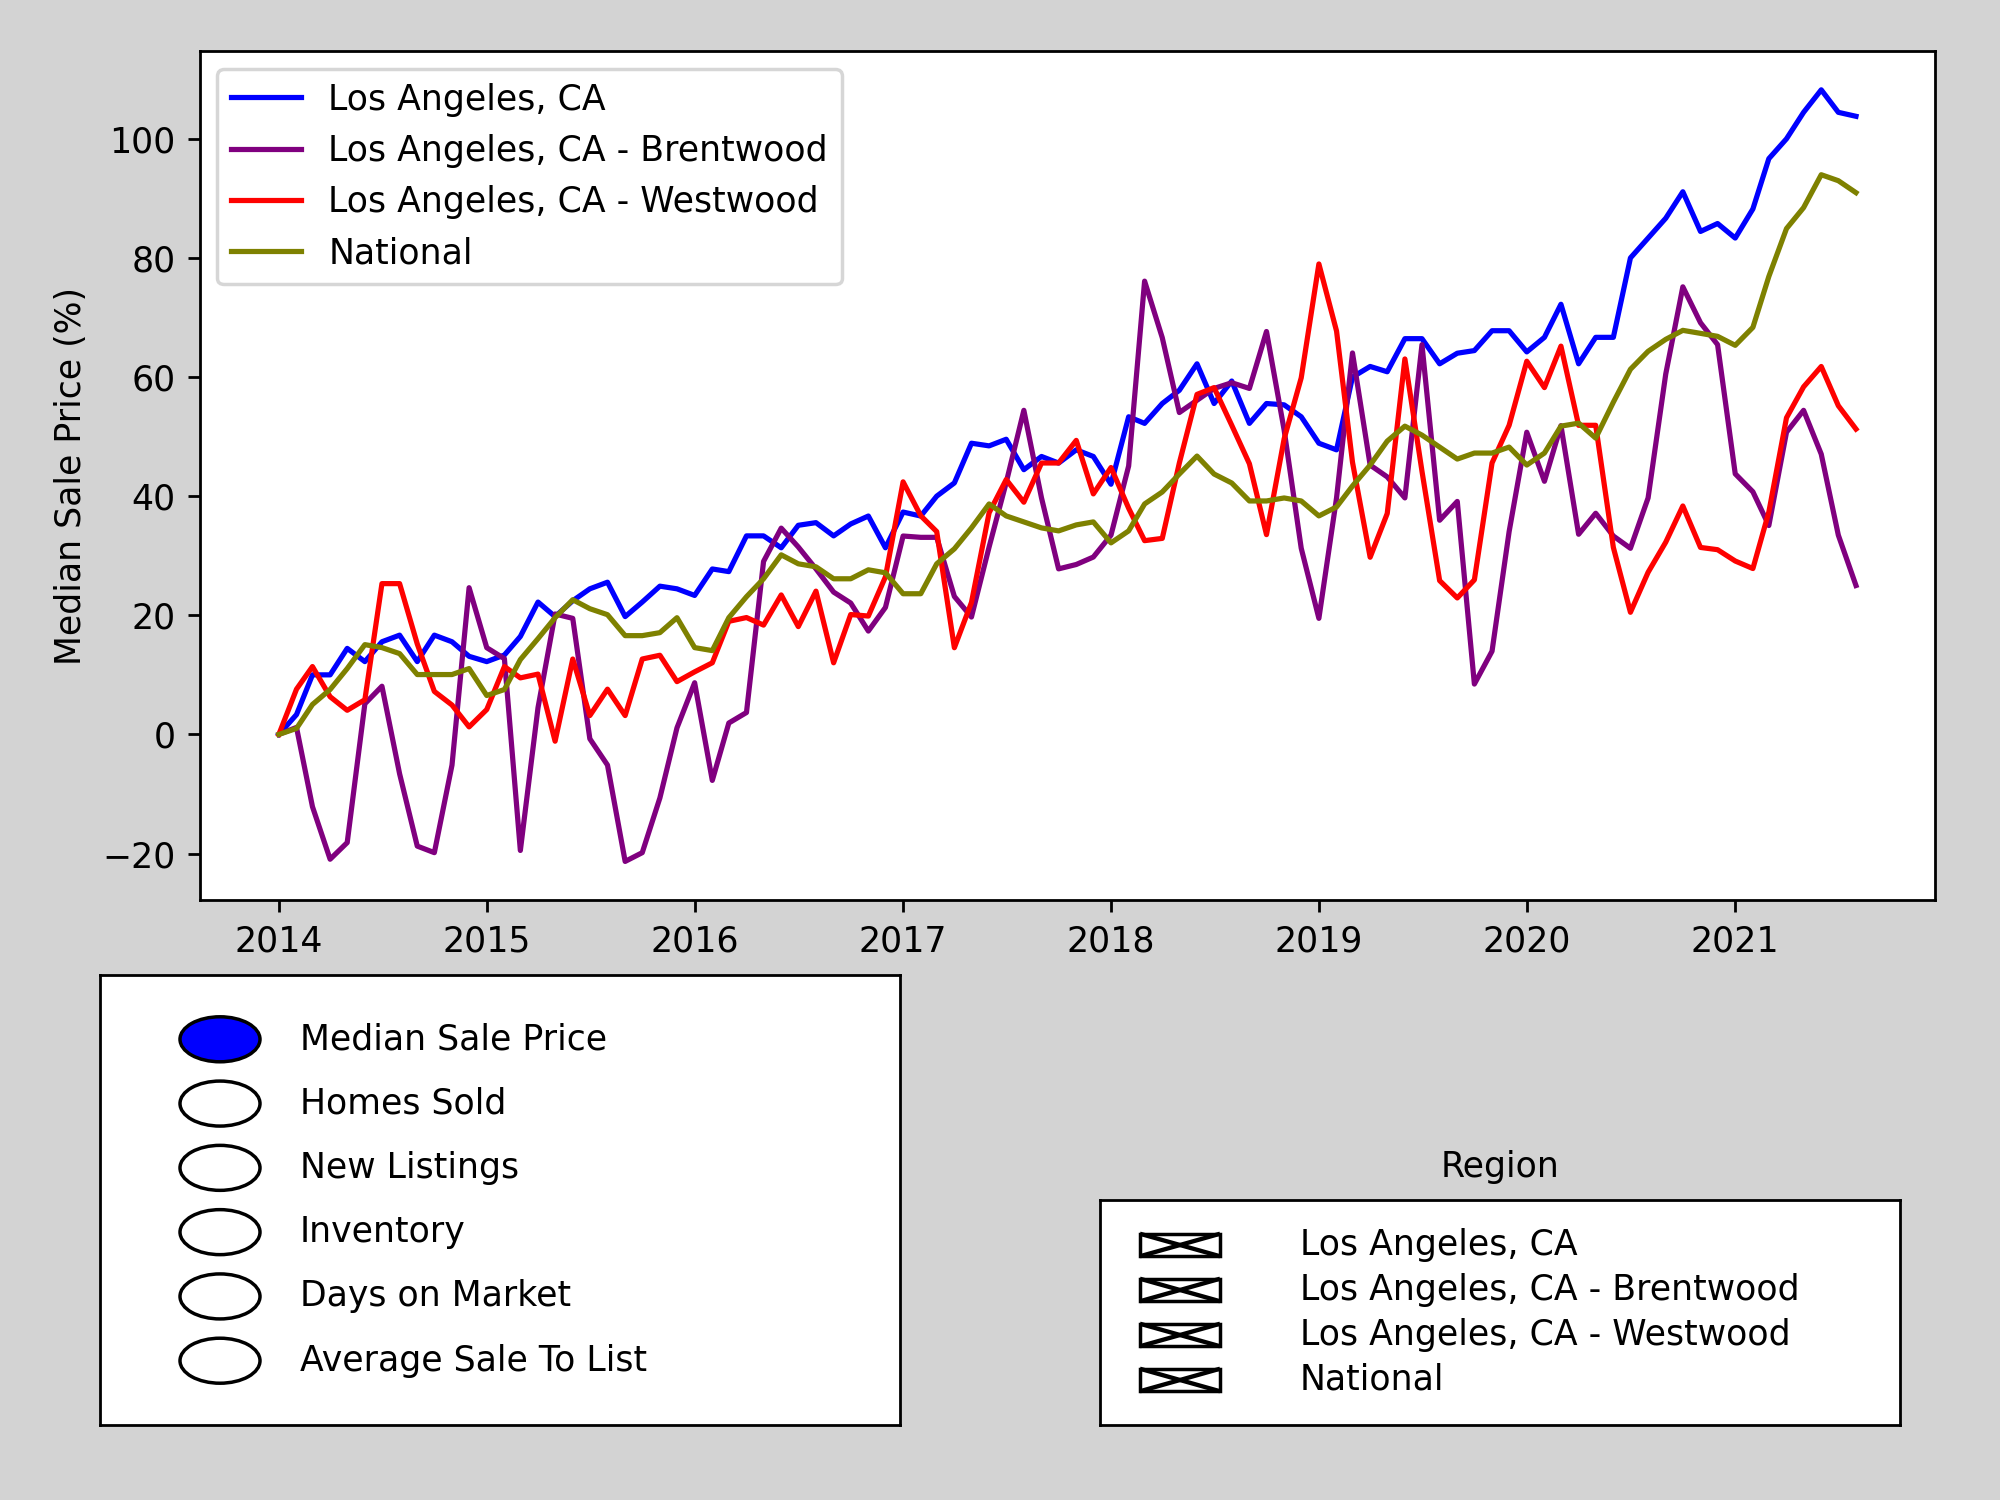

0

In [12]:
fig, ax = plt.subplots(figsize=(8,6),facecolor="lightgrey")
fig.tight_layout()
plt.subplots_adjust(left=0.1,bottom=0.4)
draw(ax,fig,data_df,data_types[0],data_info[data_types[0]],regions,region_colors)

#add region checkbox
axRegion = plt.axes([0.55, 0.05, 0.4, 0.15],facecolor="white")
axRegion.text(0.5,1.1,"Region",ha="center")
Region_checkbox=CheckButtons(axRegion, regions, len(regions)*[True])

def change_region(label):
    global regions
    
    if label in regions:
        regions.remove(label)
    else:
        regions.append(label)
    regions=sorted(regions)
    draw(ax,fig,data_df,regions,region_colors)
        
Region_checkbox.on_clicked(change_region)

#add data type radio button
axData = plt.axes([0.05, 0.05, 0.4, 0.3],facecolor="white")
Data_radiobox=RadioButtons(axData, data_info.keys())

def change_data_type(label):
    draw(ax,fig,data_df,label,data_info[label],regions,region_colors)
Data_radiobox.on_clicked(change_data_type)
#Data_radiobox.set_active(2)
# #add percentage radio button
# axData = plt.axes([0.55, 0.25, 0.4, 0.1],facecolor="white")
# Data_radiobox=RadioButtons(axData, ["As is"])


Data provided by Redfin, a national real estate brokerage.